# Import Libraries

In [187]:
import networkx as nx
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from ural import get_domain_name
import prince
from matplotlib.colors import LogNorm, Normalize

# Import Dataframes
Here we import the edges and nodes lists we created in the data cleaning file

In [129]:
#nodes
df_immigration_nodes= pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/immigration_nodes.csv")
df_stupro_nodes=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/stupro_nodes.csv")
df_decreti_nodes=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/decreti_nodes.csv")
df_lamped_nodes=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/lampedusa_nodes.csv")

#edges
df_immigration_edges=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/immigration_edges.csv")
df_stupro_edges=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/stupro_edges.csv")
df_decreti_edges=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/decreti_edges.csv")
df_lamped_edges=pd.read_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/lampedusa_edges.csv")


# Create comparative dataset

In [130]:
data = {"df":["Immigration", "Strupro di Piacenza", "Decreti sicurezza", "Lampedusa"]}
comp_df = pd.DataFrame(data, columns=["df"])
comp_df

,df
0,Immigration
1,Strupro di Piacenza
2,Decreti sicurezza
3,Lampedusa


# Create network graphs

In [131]:
G_immigration=nx.from_pandas_edgelist(df_immigration_edges, source='source_label', target='destination_label')
G_stupro=nx.from_pandas_edgelist(df_stupro_edges, source='source_label', target='destination_label')
G_decreti=nx.from_pandas_edgelist(df_decreti_edges, source='source_label', target='destination_label')
G_lamped=nx.from_pandas_edgelist(df_lamped_edges, source='source_label', target='destination_label')


In [132]:
graphs = [G_immigration,G_stupro,G_decreti,G_lamped]
names = ["Immigration","Stupro di Piacenza","Decreti sicurezza","Lampedusa"]

## Graphs sizes

In [360]:
for graph in graphs:
    print(graph.number_of_edges())
    print(graph.number_of_nodes())
    print("-------------------")

435
191
-------------------
110
85
-------------------
141
106
-------------------
137
108
-------------------


# Top Nodes

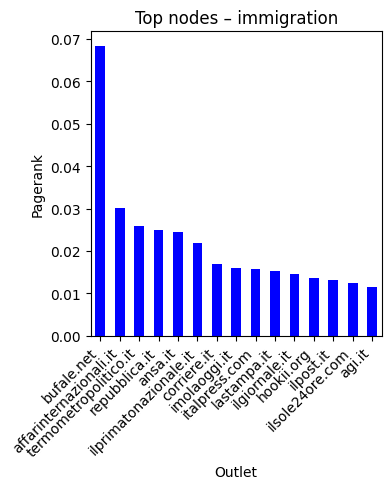

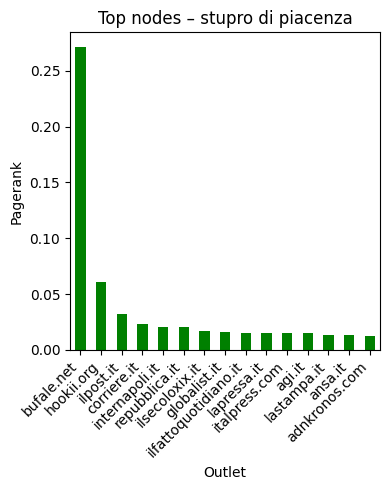

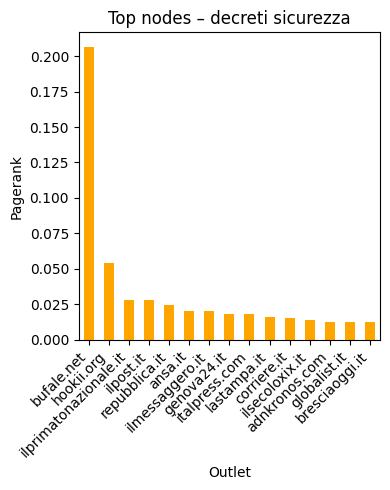

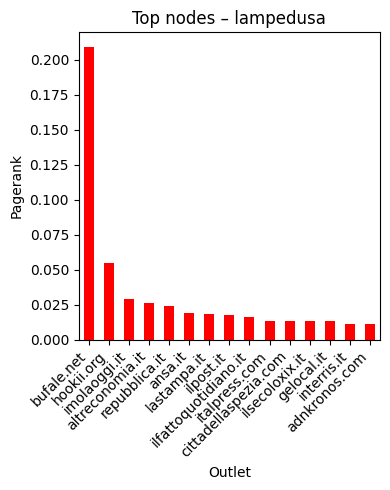

In [354]:
for i in range(0,4):
    fig,ax = plt.subplots(figsize=(4, 5), sharex=True)#gridspec_kw={'hspace': 0.5})

    centralities = nx.pagerank(graphs[i])
    
    sorted_centralities = sorted(centralities.items(), key=lambda x: x[1], reverse=True)[:15]
    outlets, centrality_values = zip(*sorted_centralities)

    centralities_data = new_dic = {'outlets':outlets, 'centrality':centrality_values}
    cetralities_df = pd.DataFrame(centralities_data, columns=['outlets','centrality']).sort_values(by="centrality", ascending=False)
    
    cetralities_df["centrality"].plot(kind='bar', color=colors[i], ax=ax, x='outlets', legend=False)
    
    ax.set_title(f'Top nodes – {names[i]}')
    ax.set_ylabel('Pagerank')
    ax.set_xlabel('Outlet')
    
    ax.set_xticks(range(len(outlets)))
    ax.set_xticklabels(outlets, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Calculate Descriptive Stats

### Density

In [133]:
comp_df["density"]=None
for i in range(len(graphs)):
    comp_df["density"][i] = nx.density(graphs[i])
comp_df

,df,density
0,Immigration,0.023974
1,Strupro di Piacenza,0.030812
2,Decreti sicurezza,0.025337
3,Lampedusa,0.023711


### Average degree

In [134]:
comp_df["avg_degree"]=None
for i in range(len(graphs)):
    comp_df["avg_degree"][i] = 2*nx.number_of_edges(graphs[i])/nx.number_of_nodes(graphs[i])
comp_df

,df,density,avg_degree
0,Immigration,0.023974,4.554974
1,Strupro di Piacenza,0.030812,2.588235
2,Decreti sicurezza,0.025337,2.660377
3,Lampedusa,0.023711,2.537037


### Compactness

The average distance works only for connected graphs through the formula ```nx.average_shortest_path_length(G)```. Below is the defined formula for compactness derives from the one reported on Borgatti 178 

In [135]:
def compactness(G):
    
    somma = 0
    
    for i in nx.nodes(G):
        for j in nx.nodes(G):
            
            if i != j:
                try:
                    somma += 1/nx.shortest_path_length(G,source=i,target=j)
                
                except nx.NetworkXNoPath as exception:
                    continue

    value = somma/(nx.number_of_nodes(G)*(nx.number_of_nodes(G)-1))
    
    return value

In [136]:
comp_df["compactness"]=None
for i in range(len(graphs)):
    comp_df["compactness"][i] = compactness(graphs[i])
comp_df

,df,density,avg_degree,compactness
0,Immigration,0.023974,4.554974,0.324796
1,Strupro di Piacenza,0.030812,2.588235,0.408039
2,Decreti sicurezza,0.025337,2.660377,0.349283
3,Lampedusa,0.023711,2.537037,0.322809


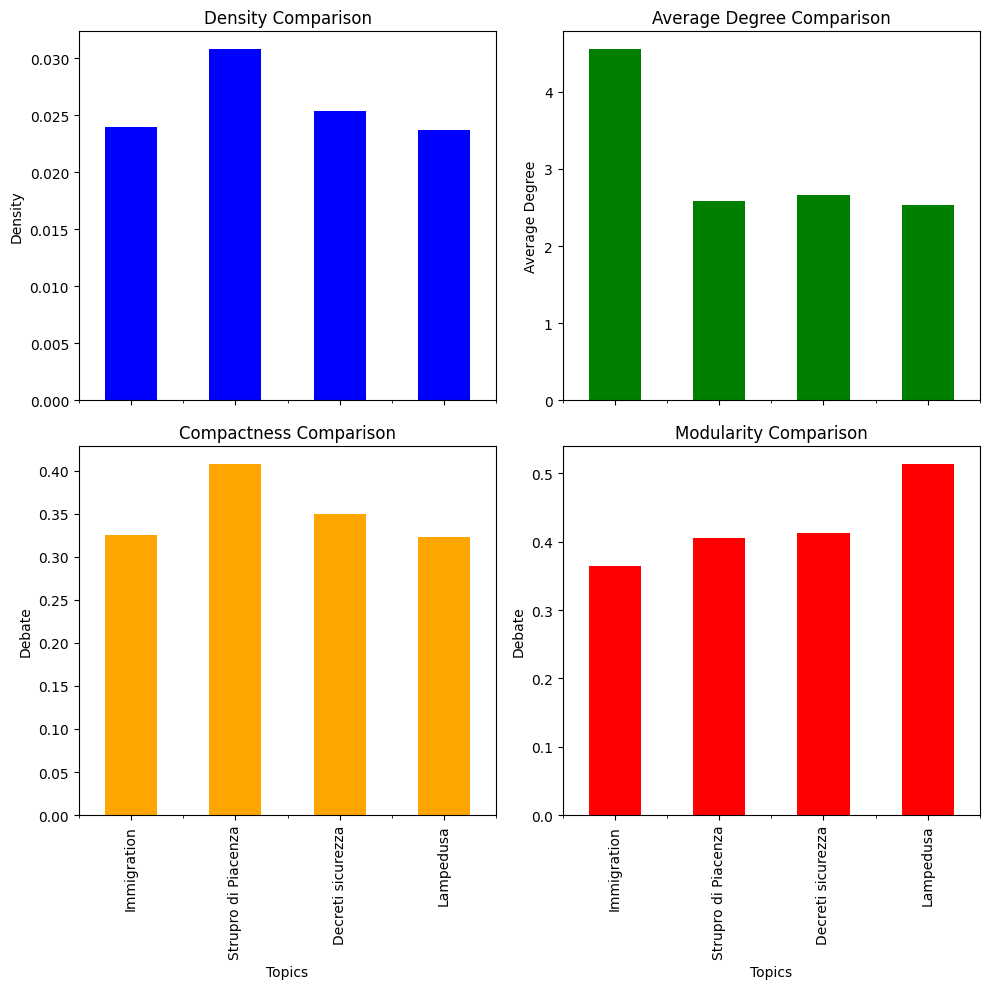

In [144]:
plot =comp_df.set_index("df")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), sharex=True)

plot['density'].plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Density Comparison')
ax1.set_ylabel('Density')
ax1.set_xlabel('Debate')

plot['avg_degree'].plot(kind='bar', color='green', ax=ax2)
ax2.set_title('Average Degree Comparison')
ax2.set_ylabel('Average Degree')
ax2.set_xlabel('Debate')

plot['compactness'].plot(kind='bar', color='orange', ax=ax3)
ax3.set_title('Compactness Comparison')
ax3.set_xlabel('Topics')
ax3.set_ylabel('Debate')

plot['modularity'].plot(kind='bar', color='red', ax=ax4)
ax4.set_title('Modularity Comparison')
ax4.set_xlabel('Topics')
ax4.set_ylabel('Debate')

plt.tight_layout()
plt.show()

# Communities and Modularity

In [137]:
com_immigration = nx.community.louvain_communities(G_immigration,
                                                           resolution = 0.5,
                                                           threshold=0.0000001,
                                                           seed=42)
com_stupro = nx.community.louvain_communities(G_stupro,
                                                           resolution = 0.5,
                                                           threshold=0.0000001,
                                                           seed=42)
com_decreti = nx.community.louvain_communities(G_decreti,
                                                           resolution = 0.5,
                                                           threshold=0.0000001,
                                                           seed=42)
com_lamped = nx.community.louvain_communities(G_lamped,
                                                           resolution = 0.5,
                                                           threshold=0.0000001,
                                                           seed=42)

coms = [com_immigration,com_stupro,com_decreti,com_lamped]

In [140]:
for i in range(len(coms)):
    print(f"A total of {len(coms[i])} communities have been detected in the {names[i]} graph")

A total of 9 communities have been detected in the Immigration graph
A total of 5 communities have been detected in the Stupro di Piacenza graph
A total of 7 communities have been detected in the Decreti sicurezza graph
A total of 9 communities have been detected in the Lampedusa graph


In [141]:
comp_df["modularity"]=None
for i in range(len(graphs)):
    comp_df["modularity"][i] = nx.community.modularity(graphs[i],coms[i])
comp_df

,df,density,avg_degree,compactness,modularity
0,Immigration,0.023974,4.554974,0.324796,0.364946
1,Strupro di Piacenza,0.030812,2.588235,0.408039,0.406116
2,Decreti sicurezza,0.025337,2.660377,0.349283,0.413234
3,Lampedusa,0.023711,2.537037,0.322809,0.514146


In [363]:
def assign_communities_to_nodeslist(com_list,df):

    node_community_map = {node: community_id for community_id, community in enumerate(com_list) for node in community}

    df['community'] = None

    for index, row in df.iterrows():
        community = node_community_map.get(row['domain'])

        df.at[index, 'community'] = community

In [364]:
assign_communities_to_nodeslist(com_list=com_immigration,df=df_immigration_nodes)
assign_communities_to_nodeslist(com_list=com_stupro,df=df_stupro_nodes)
assign_communities_to_nodeslist(com_list=com_decreti,df=df_decreti_nodes)
assign_communities_to_nodeslist(com_list=com_lamped,df=df_lamped_nodes)

### Export the communities and media types to gephi for plotting

In [366]:
df_immigration_nodes.to_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/immigration_nodes.csv", index=False)
df_stupro_nodes.to_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/stupro_nodes.csv", index=False)
df_decreti_nodes.to_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/decreti_nodes.csv", index=False)
df_lamped_nodes.to_csv("/Users/giovanni/masterthesis/6_Preliminary_Analysis/immigration polarization/final_edgelists/lampedusa_nodes.csv", index=False)

# Stier clusters and correspondence analysis

### Select outlets present in Stier et al

In [145]:
stier_dic={"number":[0,1,2,3,4,5,6],
           "name":[0, 'Quality print outlets', 'Commercial broadcasting','Public broadcasting',
                   'Tabloid press', 'Digital−born outlets','Hyperpartisan news']}
stier_df=pd.DataFrame(data=stier_dic, columns=['number','name'])
stier_df

,number,name
0,0,0
1,1,Quality print outlets
2,2,Commercial broadcasting
3,3,Public broadcasting
4,4,Tabloid press
5,5,Digital−born outlets
6,6,Hyperpartisan news


Class 0 means that the outlet is not present in the stier et al. 2020 classification

In [157]:
dataframes = [df_immigration_edges,df_stupro_edges,df_decreti_edges,df_lamped_edges]

In [158]:
immigration_ca_nodes = df_immigration_nodes[df_immigration_nodes["media_class"]>0]
stupro_ca_nodes = df_stupro_nodes[df_stupro_nodes["media_class"]>0]
decreti_ca_nodes = df_decreti_nodes[df_decreti_nodes["media_class"]>0]
lamped_ca_nodes = df_lamped_nodes[df_lamped_nodes["media_class"]>0]

### Create contingency tables

In [318]:
imm_contingency_table = pd.crosstab(index=df_immigration_edges['source_label'],
                                columns=df_immigration_edges['destination_label'],
                                values=df_immigration_edges['count'],
                                aggfunc='sum')

stupro_contingency_table = pd.crosstab(index=df_stupro_edges['source_label'],
                                columns=df_stupro_edges['destination_label'],
                                values=df_stupro_edges['count'],
                                aggfunc='sum')

decreti_contingency_table = pd.crosstab(index=df_decreti_edges['source_label'],
                                columns=df_decreti_edges['destination_label'],
                                values=df_decreti_edges['count'],
                                aggfunc='sum')

lamped_contingency_table = pd.crosstab(index=df_lamped_edges['source_label'],
                                columns=df_lamped_edges['destination_label'],
                                values=df_lamped_edges['count'],
                                aggfunc='sum')

contingency_tables = [imm_contingency_table,stupro_contingency_table,
                      decreti_contingency_table,lamped_contingency_table]

for i in range(len(contingency_tables)):
    contingency_tables[i].fillna(0,inplace=True)

### Run and plot correspondence analyses

In [319]:
ca = prince.CA(n_components=3,n_iter=10,copy=True,check_input=True,engine='sklearn',random_state=42)
ca_imm = ca.fit(imm_contingency_table)

In [320]:
ca = prince.CA(n_components=3,n_iter=10,copy=True,check_input=True,engine='sklearn',random_state=42)
ca_stupro = ca.fit(stupro_contingency_table)

In [321]:
ca = prince.CA(n_components=3,n_iter=10,copy=True,check_input=True,engine='sklearn',random_state=42)
ca_decreti = ca.fit(decreti_contingency_table) 

In [322]:
ca = prince.CA(n_components=3,n_iter=10,copy=True,check_input=True,engine='sklearn',random_state=42)
ca_lamped = ca.fit(lamped_contingency_table)

### Calculate the distances

In [324]:
def euclidean_distance(vector1, vector2):
    array1 = np.array(vector1)
    array2 = np.array(vector2)

    distance = np.linalg.norm(array1 - array2)

    return distance

def calculate_domain_distance(ca,contingency_table, domain1, domain2):
    row_coordinates_df = ca.row_coordinates(contingency_table)

    vector_a = row_coordinates_df[row_coordinates_df.index == domain1]
    vector_b = row_coordinates_df[row_coordinates_df.index == domain2]

    return euclidean_distance(vector_a, vector_b)

In [323]:
imm_distance_df = pd.DataFrame(columns=["domain1", "domain2", "distance"])

immigration_ca_nodes.reset_index(drop=True, inplace=True)

for i in range(len(immigration_ca_nodes)):
    domain1 = immigration_ca_nodes['domain'][i]
    
    for j in range(len(immigration_ca_nodes)):
        domain2 = immigration_ca_nodes['domain'][j]  
        distance = calculate_domain_distance(ca_imm, imm_contingency_table, domain1, domain2)

        temp_df = pd.DataFrame({"domain1": [domain1], "domain2": [domain2], "distance": [distance]}, columns = ["domain1", "domain2", "distance"])
        
        imm_distance_df = pd.concat([imm_distance_df, temp_df], ignore_index=True)
        
##########################
stupro_distance_df = pd.DataFrame(columns=["domain1", "domain2", "distance"])

stupro_ca_nodes.reset_index(drop=True, inplace=True)

for i in range(len(stupro_ca_nodes)):
    domain1 = stupro_ca_nodes['domain'][i]
    
    for j in range(len(stupro_ca_nodes)):
        domain2 = stupro_ca_nodes['domain'][j]  
        distance = calculate_domain_distance(ca_stupro, stupro_contingency_table, domain1, domain2)

        temp_df = pd.DataFrame({"domain1": [domain1], "domain2": [domain2], "distance": [distance]}, columns = ["domain1", "domain2", "distance"])
        
        stupro_distance_df = pd.concat([stupro_distance_df, temp_df], ignore_index=True)

##########################
decreti_distance_df = pd.DataFrame(columns=["domain1", "domain2", "distance"])

decreti_ca_nodes.reset_index(drop=True, inplace=True)

for i in range(len(decreti_ca_nodes)):
    domain1 = decreti_ca_nodes['domain'][i]
    
    for j in range(len(decreti_ca_nodes)):
        domain2 = decreti_ca_nodes['domain'][j]  
        distance = calculate_domain_distance(ca_decreti, decreti_contingency_table, domain1, domain2)

        temp_df = pd.DataFrame({"domain1": [domain1], "domain2": [domain2], "distance": [distance]}, columns = ["domain1", "domain2", "distance"])
        
        decreti_distance_df = pd.concat([decreti_distance_df, temp_df], ignore_index=True)
        
##########################
lamped_distance_df = pd.DataFrame(columns=["domain1", "domain2", "distance"])

lamped_ca_nodes.reset_index(drop=True, inplace=True)

for i in range(len(lamped_ca_nodes)):
    domain1 = lamped_ca_nodes['domain'][i]
    
    for j in range(len(lamped_ca_nodes)):
        domain2 = lamped_ca_nodes['domain'][j]  
        distance = calculate_domain_distance(ca_lamped, lamped_contingency_table, domain1, domain2)

        temp_df = pd.DataFrame({"domain1": [domain1], "domain2": [domain2], "distance": [distance]}, columns = ["domain1", "domain2", "distance"])
        
        lamped_distance_df = pd.concat([lamped_distance_df, temp_df], ignore_index=True)

In [325]:
merged_df = imm_distance_df.merge(stupro_distance_df, on=["domain1", "domain2"], how="outer", suffixes=('_imm', '_stupro'))
merged_df = merged_df.merge(decreti_distance_df, on=["domain1", "domain2"], how="outer", suffixes=('_stupro', '_decreti'))
merged_df = merged_df.merge(lamped_distance_df, on=["domain1", "domain2"], how="outer", suffixes=('_decreti', '_lamped'))

In [326]:
merged_df["domain1_class"] = merged_df["domain1"].map(df_immigration_nodes.set_index("domain")["media_class"])
merged_df["domain2_class"] = merged_df["domain2"].map(df_immigration_nodes.set_index("domain")["media_class"])
merged_df.head()

,domain1,domain2,distance_imm,distance_stupro,distance_decreti,distance_lamped,domain1_class,domain2_class
0,repubblica.it,repubblica.it,0.000000,0.0,0.0,0.0,1,1
1,repubblica.it,ansa.it,0.000000,0.0,0.0,0.0,1,1
2,repubblica.it,corriere.it,0.042830,0.0,0.0,0.0,1,1
3,repubblica.it,lastampa.it,0.031289,0.0,0.0,0.0,1,1
4,repubblica.it,ilsole24ore.com,0.080862,0.0,0.0,0.0,1,1


In [327]:
imm_distance_df["domain1_class"] = imm_distance_df["domain1"].map(df_immigration_nodes.set_index("domain")["media_type"])
imm_distance_df["domain2_class"] = imm_distance_df["domain2"].map(df_immigration_nodes.set_index("domain")["media_type"])

stupro_distance_df["domain1_class"] = stupro_distance_df["domain1"].map(df_immigration_nodes.set_index("domain")["media_type"])
stupro_distance_df["domain2_class"] = stupro_distance_df["domain2"].map(df_immigration_nodes.set_index("domain")["media_type"])

decreti_distance_df["domain1_class"] = decreti_distance_df["domain1"].map(df_immigration_nodes.set_index("domain")["media_type"])
decreti_distance_df["domain2_class"] = decreti_distance_df["domain2"].map(df_immigration_nodes.set_index("domain")["media_type"])

lamped_distance_df["domain1_class"] = lamped_distance_df["domain1"].map(df_immigration_nodes.set_index("domain")["media_type"])
lamped_distance_df["domain2_class"] = lamped_distance_df["domain2"].map(df_immigration_nodes.set_index("domain")["media_type"])


### Plot the distances between media classes

In [328]:
def calculate_avg_distance(df):
    different_classes = df[df['domain1_class'] != df['domain2_class']]
    avg_distance = different_classes.groupby(['domain1_class', 'domain2_class'])['distance'].mean().unstack()
    return avg_distance


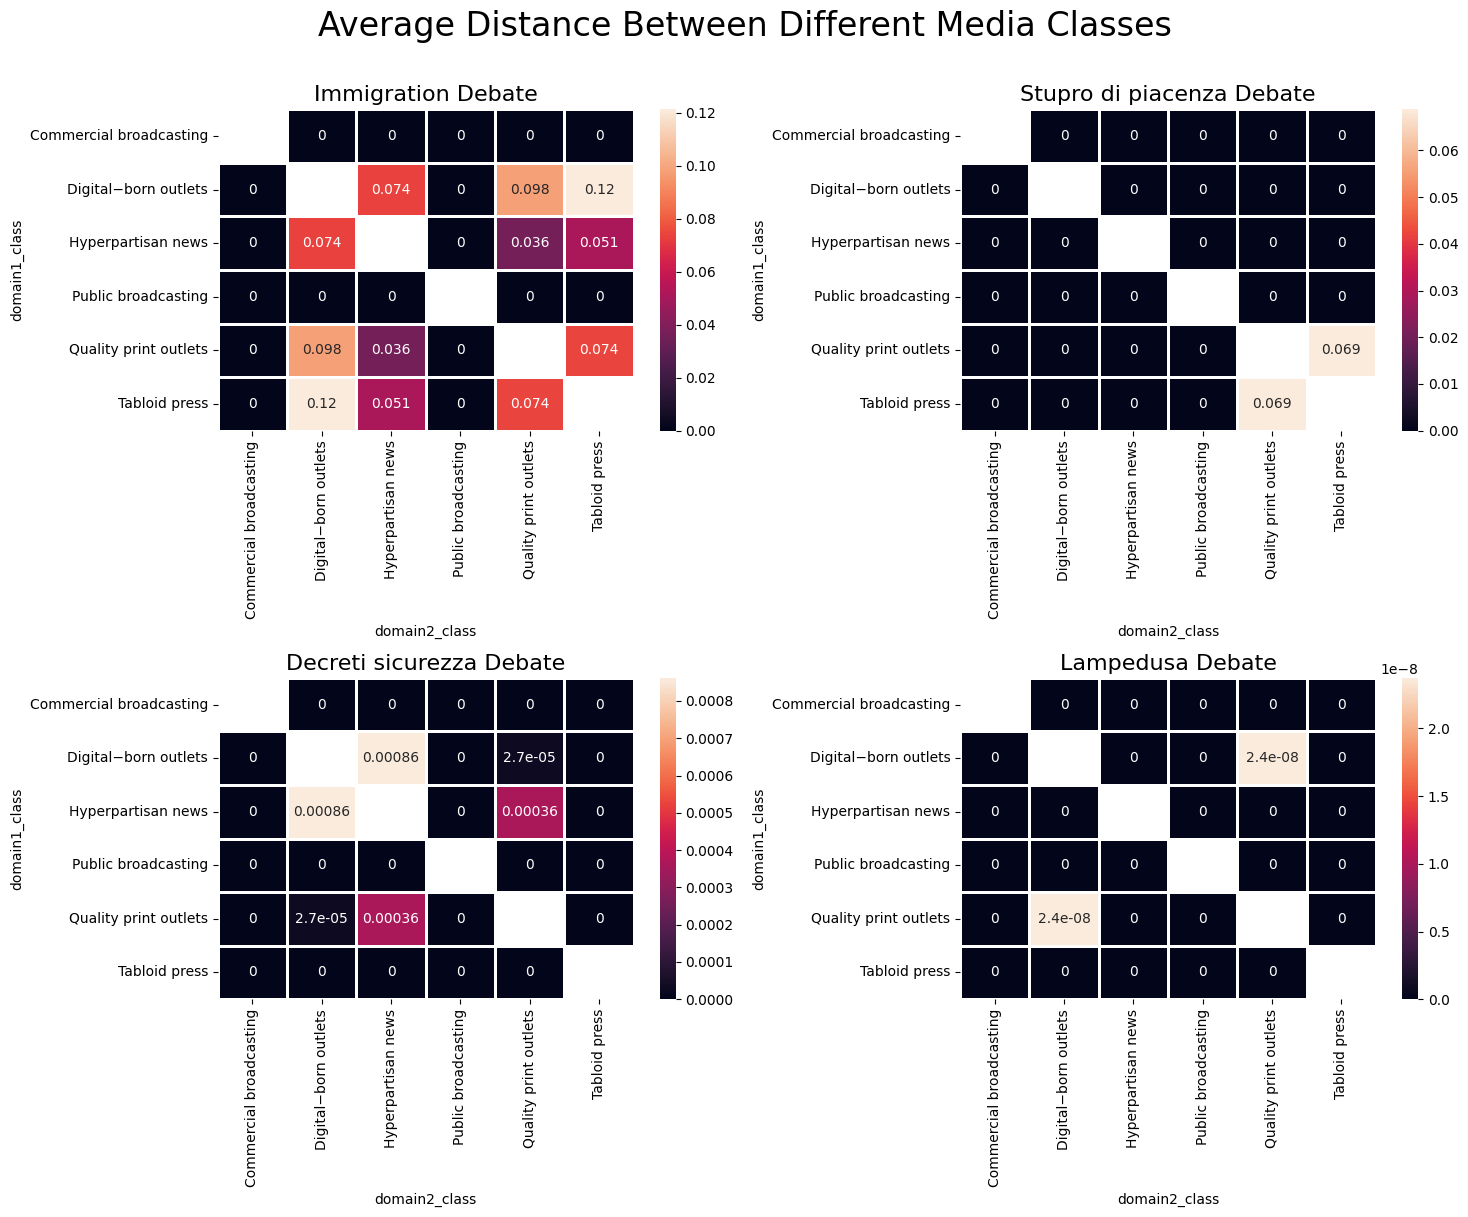

In [370]:
dataframes = [imm_distance_df, stupro_distance_df, decreti_distance_df, lamped_distance_df]
names = ['immigration', 'stupro di piacenza', 'decreti sicurezza', 'lampedusa']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Average Distance Between Different Media Classes', fontsize=24,  y=1.01)

for df, name, ax in zip(dataframes, names, axes.flatten()):
   
    avg_distance = calculate_avg_distance(df)
    sns.heatmap(avg_distance, annot=True, ax=ax,linewidth=.8 )
    ax.set_title(f'{name.capitalize()} Debate', fontsize=16)

plt.tight_layout()
plt.show()


### Plot the distances between domains

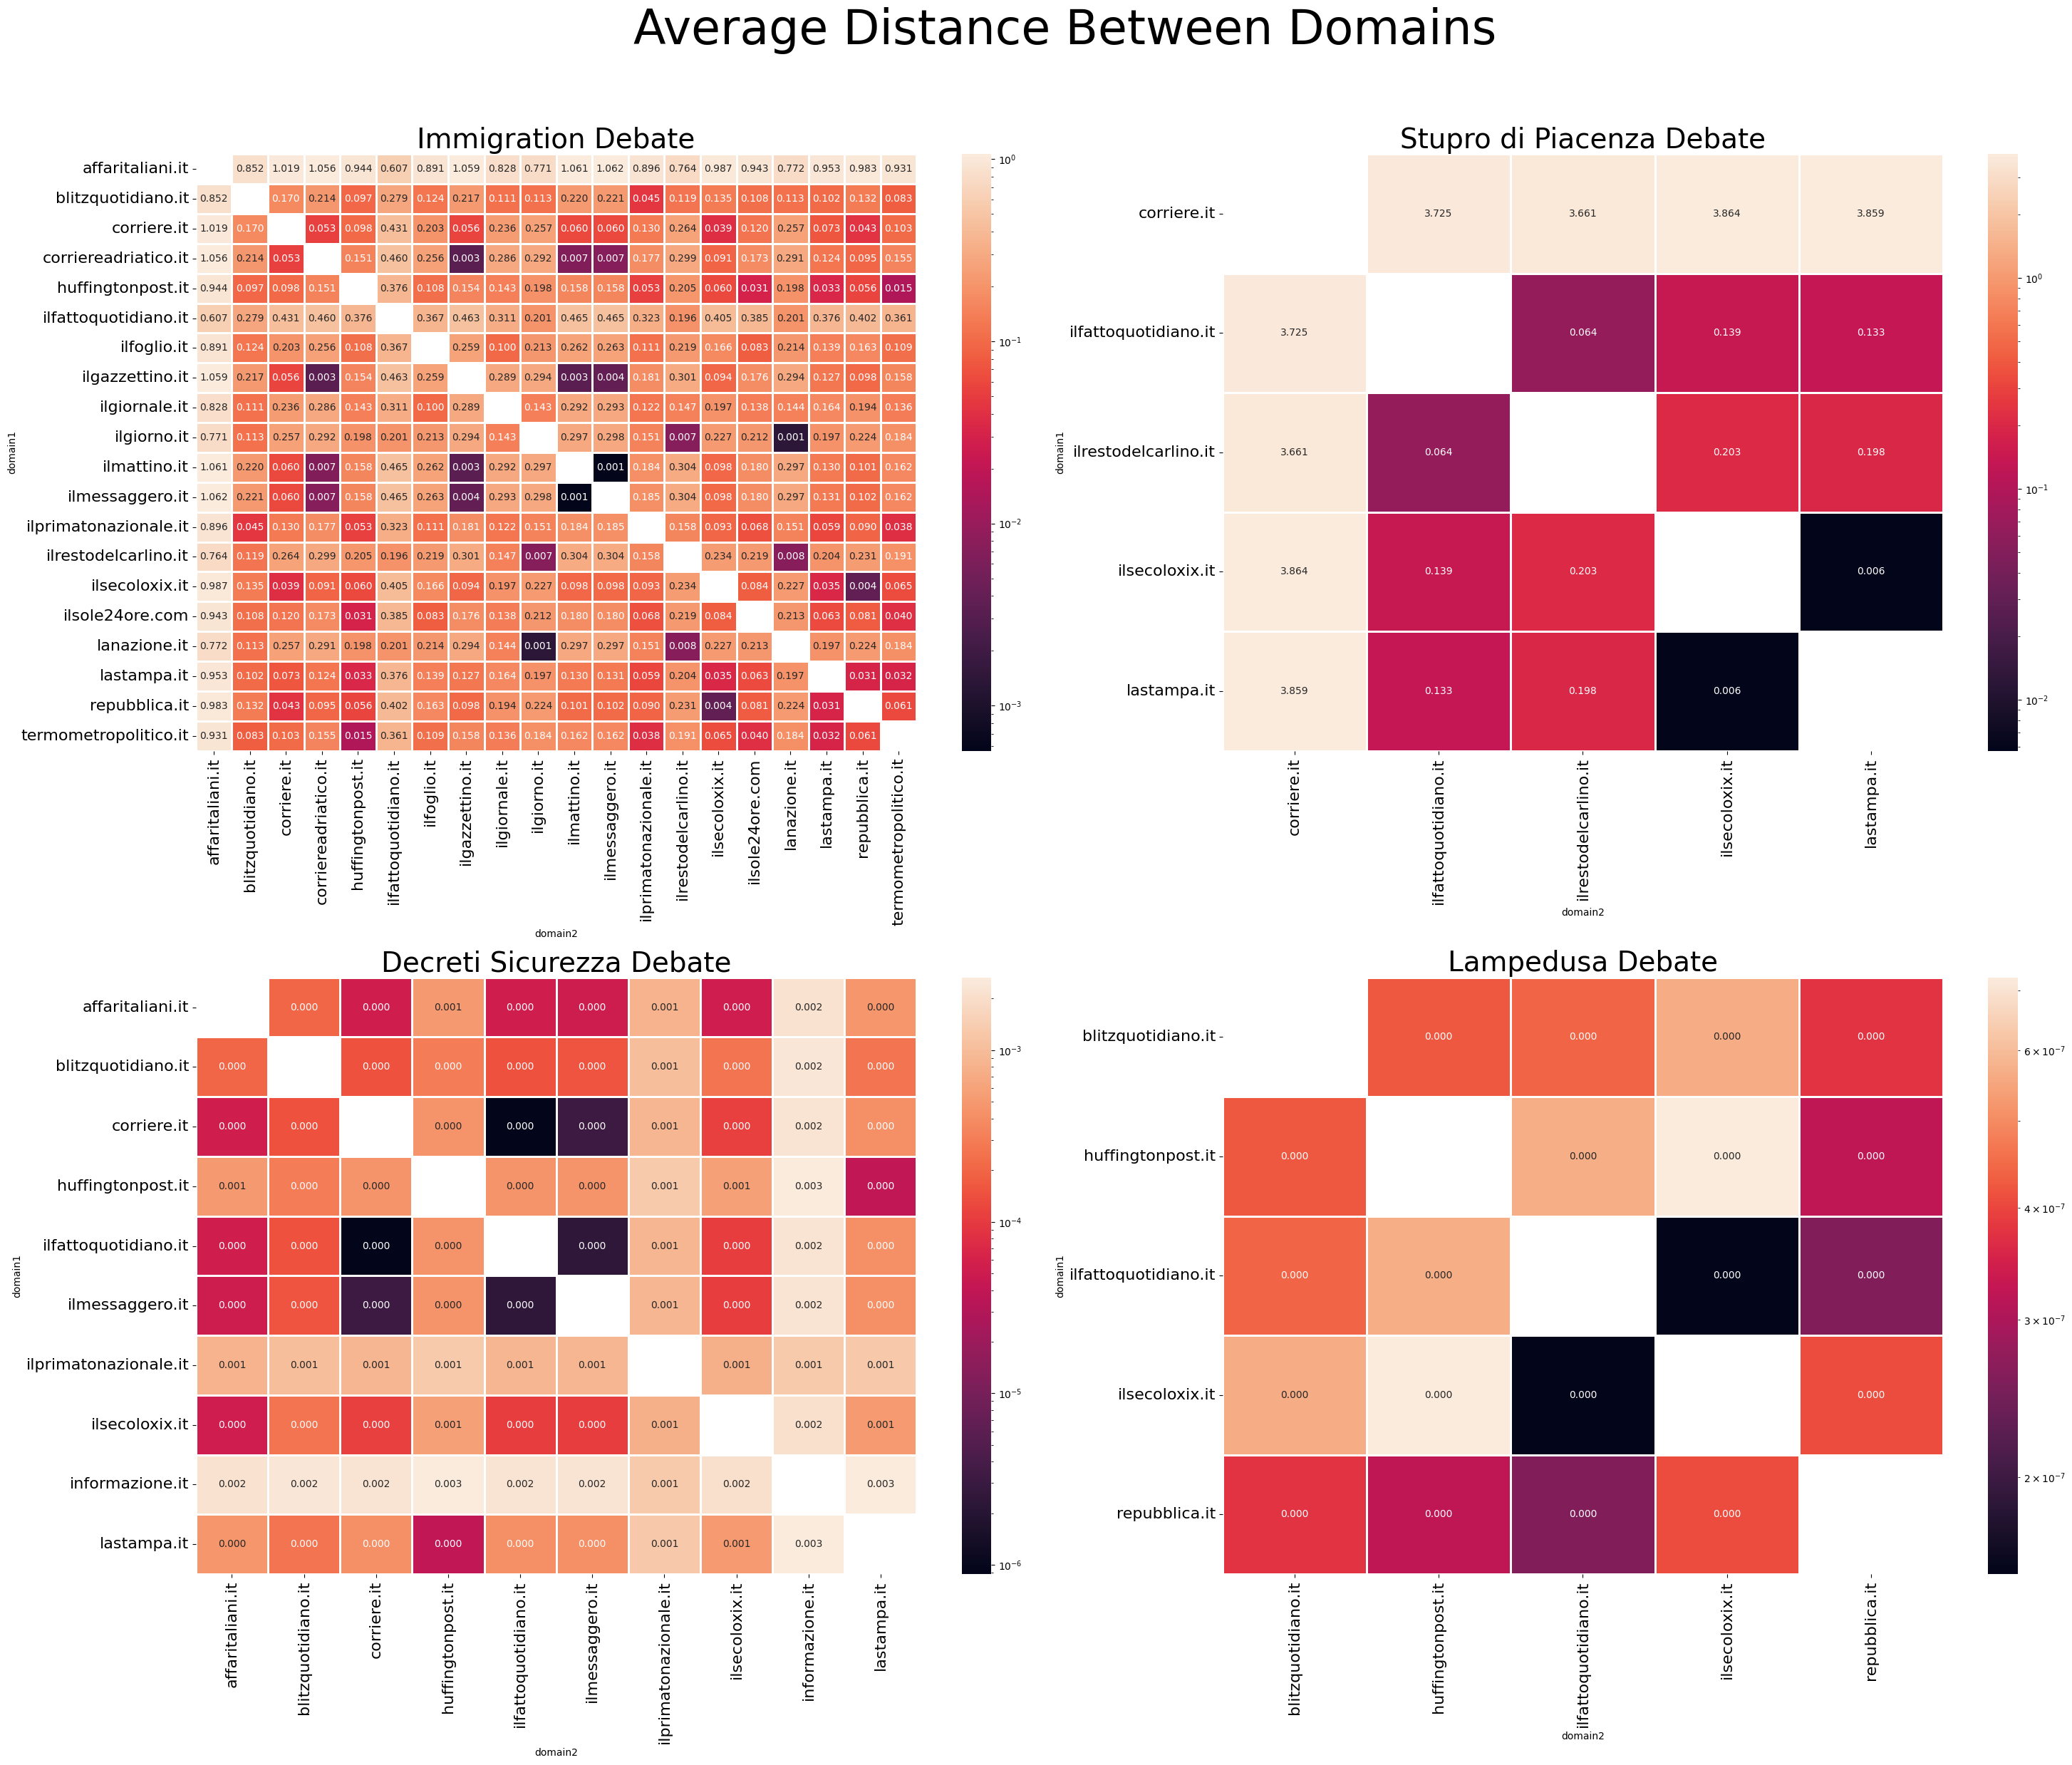

In [345]:
data_frames = [imm_distance_df, stupro_distance_df, decreti_distance_df, lamped_distance_df]
titles = ['Immigration', 'Stupro di Piacenza', 'Decreti Sicurezza', 'Lampedusa']

fig, axes = plt.subplots(2, 2, figsize=(30, 24))
fig.suptitle('Average Distance Between Domains', fontsize=48,  y=1.03)


for ax, df, title in zip(axes.flatten(), data_frames, titles):
    heatmap_data = df.pivot(index='domain1', columns='domain2', values='distance')
    non_zero_rows = heatmap_data[(heatmap_data != 0).any(axis=1)]
    non_zero_columns = non_zero_rows.loc[:, (non_zero_rows != 0).any(axis=0)]

    sn.heatmap(
        non_zero_columns,
        ax=ax,
        annot=True,
        fmt=".3f",
        linewidth=.8,
        norm=LogNorm(),
    )
    
    ax.set_xticklabels(ax.get_xticklabels(), size=16, rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), size=16, rotation=0)
    ax.set_title(f'{title} Debate', fontsize=28)

plt.tight_layout()
plt.show()

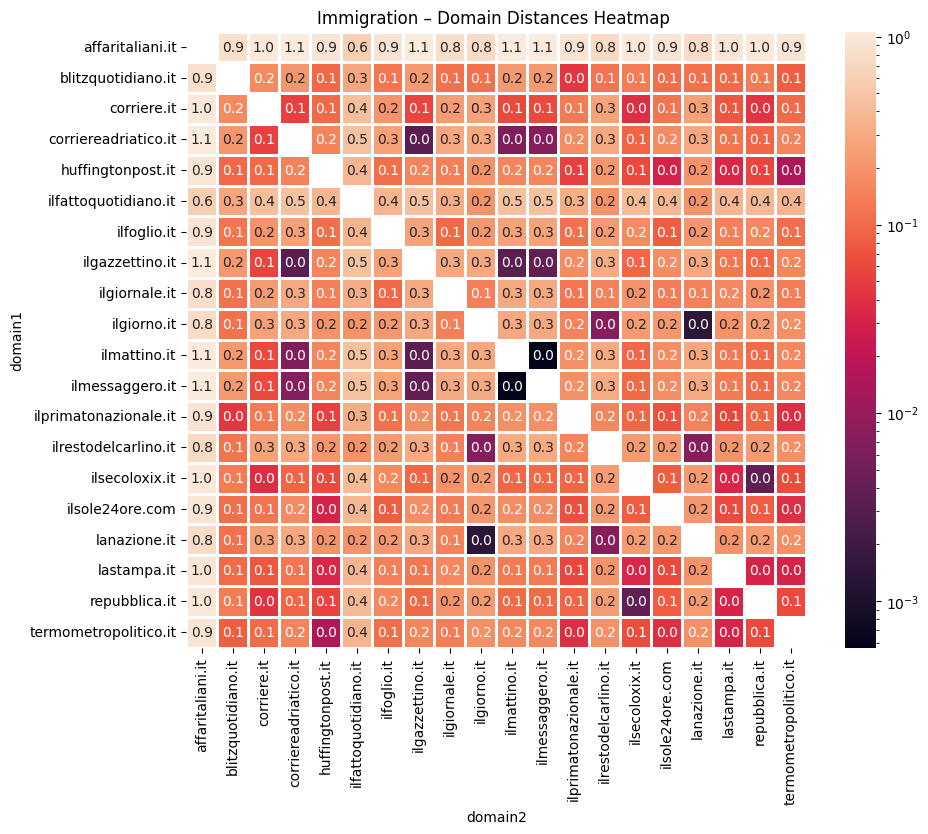

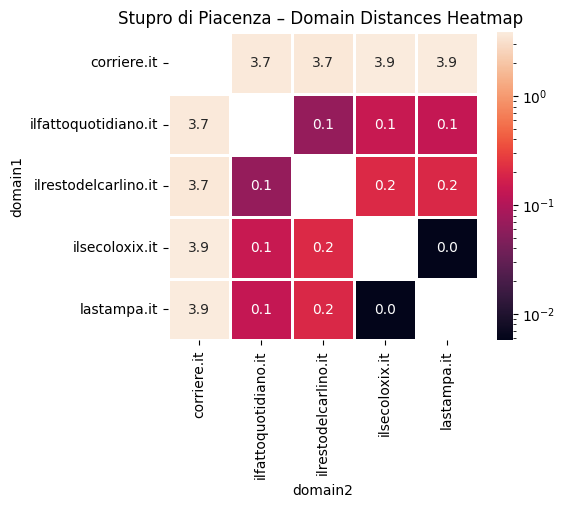

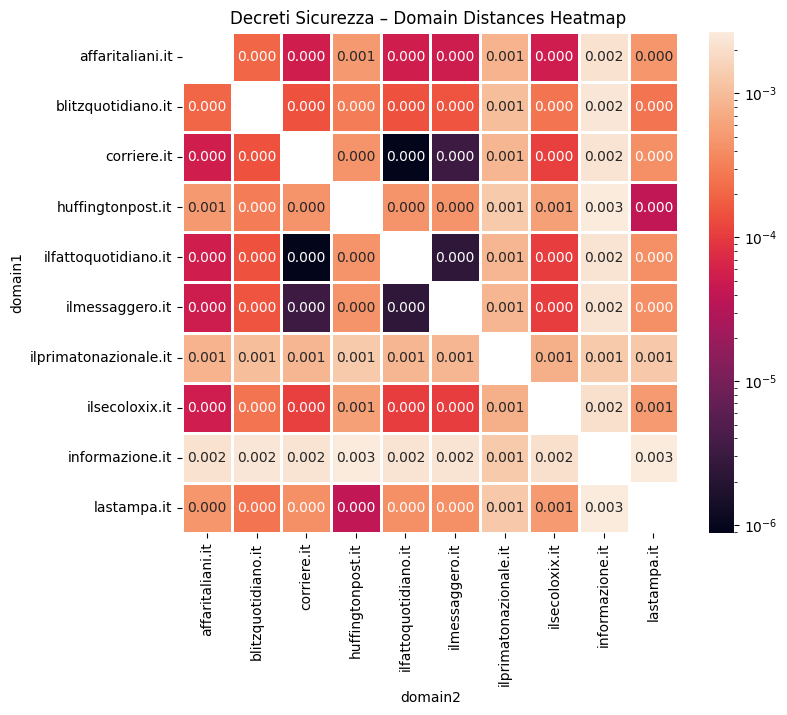

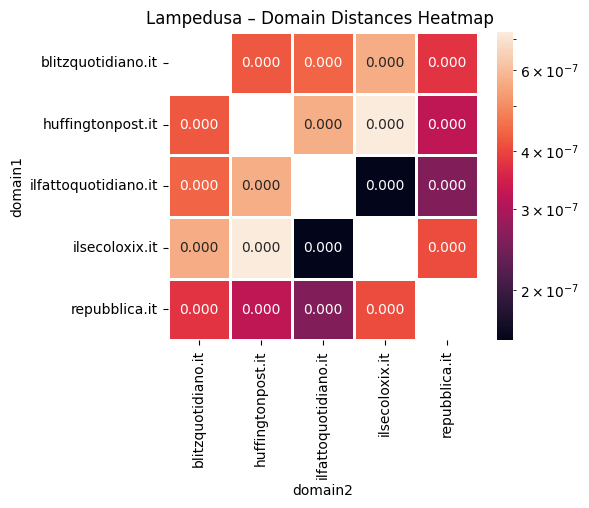

In [263]:
################
heatmap_data = imm_distance_df.pivot(index='domain1', columns='domain2', values='distance')

non_zero_rows = heatmap_data[(heatmap_data != 0).any(axis=1)]
non_zero_columns = non_zero_rows.loc[:, (non_zero_rows != 0).any(axis=0)]

plt.figure(figsize=(10, 8))
sn.heatmap(non_zero_columns, annot=True, fmt=".1f",linewidth=.8, norm=LogNorm())
plt.title('Immigration – Domain Distances Heatmap ')
plt.show()

################
heatmap_data = stupro_distance_df.pivot(index='domain1', columns='domain2', values='distance')

non_zero_rows = heatmap_data[(heatmap_data != 0).any(axis=1)]
non_zero_columns = non_zero_rows.loc[:, (non_zero_rows != 0).any(axis=0)]

plt.figure(figsize=(5, 4))
sn.heatmap(non_zero_columns, annot=True, fmt=".1f",linewidth=.8, norm=LogNorm())
plt.title('Stupro di Piacenza – Domain Distances Heatmap ')
plt.show()

################
heatmap_data = decreti_distance_df.pivot(index='domain1', columns='domain2', values='distance')

non_zero_rows = heatmap_data[(heatmap_data != 0).any(axis=1)]
non_zero_columns = non_zero_rows.loc[:, (non_zero_rows != 0).any(axis=0)]

plt.figure(figsize=(8, 6.5))
sn.heatmap(non_zero_columns, annot=True, fmt=".3f",linewidth=.8, norm=LogNorm())
plt.title('Decreti Sicurezza – Domain Distances Heatmap ')
plt.show()

################
heatmap_data = lamped_distance_df.pivot(index='domain1', columns='domain2', values='distance')

non_zero_rows = heatmap_data[(heatmap_data != 0).any(axis=1)]
non_zero_columns = non_zero_rows.loc[:, (non_zero_rows != 0).any(axis=0)]

plt.figure(figsize=(5, 4))
sn.heatmap(non_zero_columns, annot=True, fmt=".3f",linewidth=.8, norm=LogNorm())
plt.title('Lampedusa – Domain Distances Heatmap ')
plt.show()